### Importing necessary libraries

In [1]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import statistics

### Importing the data

In [2]:
# use a personal style sheet
plt.style.use("./styles/mystyle.mplstyle")

# listing all the current data
data_files = glob.glob(r'../Experiment/data/*.csv') # taking only the two complete files

### Concatenating all data into one big dataset

In [3]:
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_csv(data_files[i])
    df = pd.concat([df, temp_df])

# select only the main task
df = df.loc[df['task']=='experiment']

# extracting sample size
n = len(set(df.pt_num))


###  the effect of SOA, difficulty of occlusion, and size of occlusion.

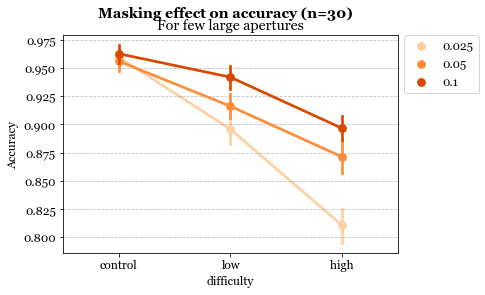

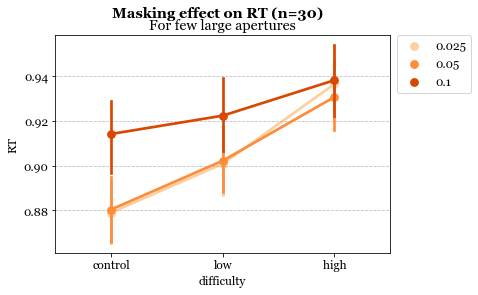

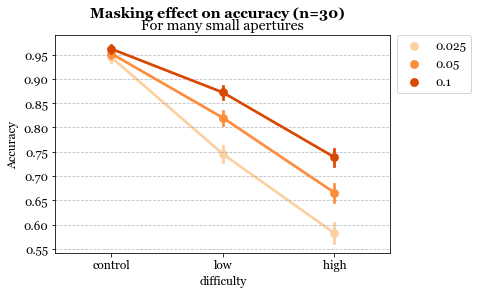

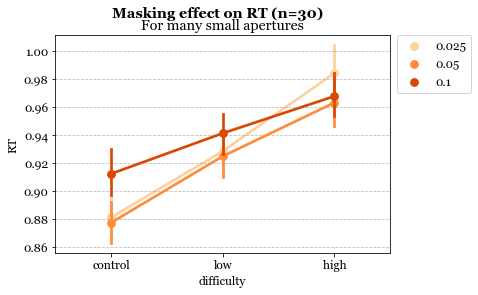

In [4]:
# checking the effect of masking
# for each occluder size separately
for so in set(df['size_occl']):
    # for each measure of performance separately
    for dv in ['acc', 'rt']:
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        plt.figure()
        plot = sns.pointplot(
            data = data.loc[data['size_occl']==so],
            y = dv,
            x = 'difficulty',
            order = ['control', 'low', 'high'],
            hue = 'soa',
            palette = 'Oranges',
            join = True
        )
        if dv == 'acc':
            # plt.ylim(0.6, 1)
            plt.ylabel("Accuracy")
            plt.suptitle("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            # plt.ylim(900, 1200)
            plt.ylabel("RT")
            plt.suptitle("Masking effect on RT (n={})".format(n))
        plt.title('For {} apertures'.format(so))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

### Checking the effect of category on experiment**

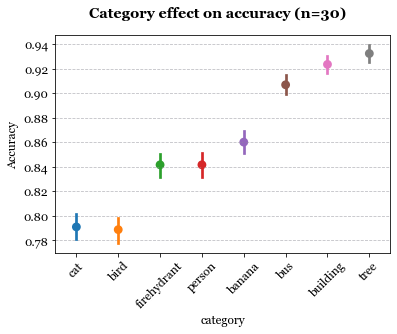

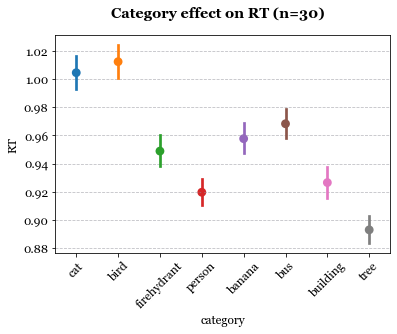

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on categories and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n3. I have arranged the order by hand to be clear looking, is there any easy way to do that?\n\n"

In [5]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'category',
        order = ['cat', 'bird', 'firehydrant','person', 'banana','bus','building', 'tree'],
        # hue = 'soa',
        # hue = 'size_occl',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Category effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Category effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on categories and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

3. I have arranged the order by hand to be clear looking, is there any easy way to do that?

"""

### Checking the effect of keys on experiment

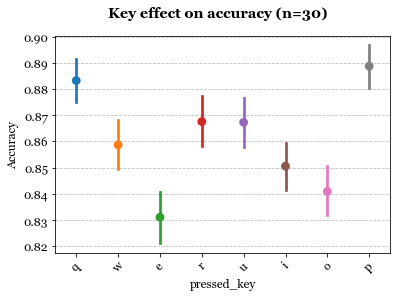

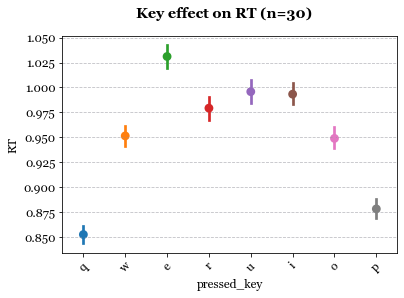

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on keys and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [6]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'pressed_key',
        order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on keys and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

### Checking the effect of block whether participants accuracy and reaction time depends on the block number

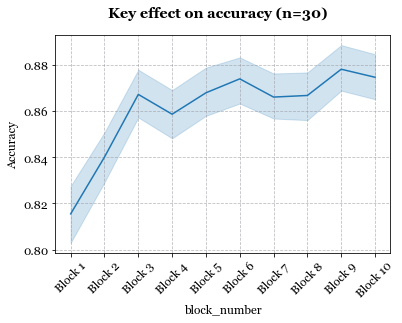

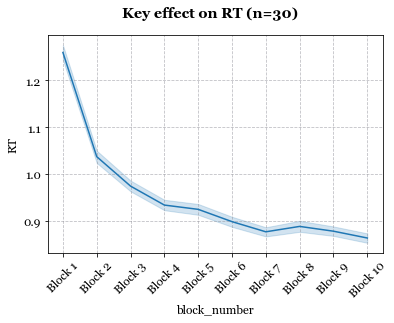

"\nQuestions/Remarks:\nThe discrepancy in between the first block and the rest is further explored on the next cell. \nWorse participants performs considerably worser in the 1st block\n\n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on blocks and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [7]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.lineplot(
        data = df,
        y = dv,
        x = 'block_number',
        #order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        # hue = 'pt_num',
        palette = 'tab10',
        # join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions/Remarks:
The discrepancy in between the first block and the rest is further explored on the next cell. 
Worse participants performs considerably worser in the 1st block

1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on blocks and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30')])

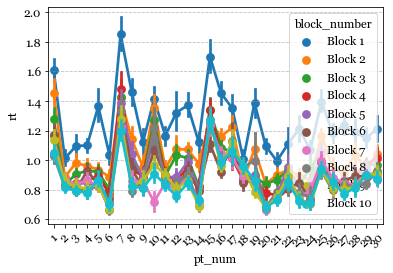

In [8]:
#Checking reaction time per block depending
sns.pointplot(x = df['pt_num'] , y = df['rt'], data = df, hue = 'block_number', palette = 'tab10')
plt.xticks(rotation = 45)

### difference between the control conditions in few large and many small

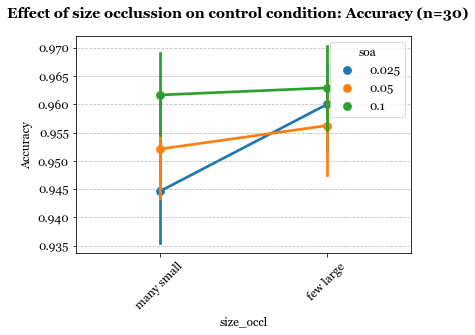

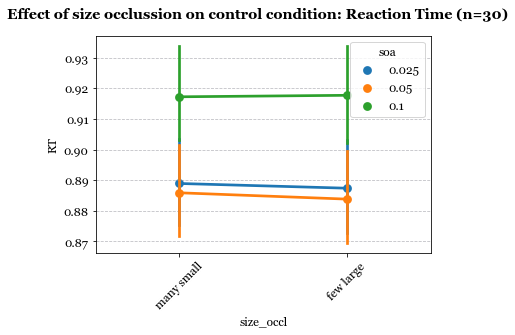

"\nRemarks:\nMore or less it seems to be stable, with few large condition being easier than many small\nReaction time is stable. Comment hue, if we don't want to see depending on SOA.\n\n\n\n"

In [11]:
# for each measure of performance separately
df1 = df[ df["difficulty"] == "control"]
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df1
    elif dv == 'acc':
        data = df1
    plt.figure()
    plot = sns.pointplot(
        data = df1,
        y = dv,
        x = 'size_occl',
        #order = ['q','w','e','r','u','i','o','p'],
        hue = 'soa',
        palette = 'tab10',
        join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of size occlussion on control condition: Accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Effect of size occlussion on control condition: Reaction Time (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Remarks:
More or less it seems to be stable, with few large condition being easier than many small
Reaction time is stable. Comment hue, if we don't want to see depending on SOA.



"""

### Checking Confusion Matrix on responses

'\nOK so what happened now? It seems a bit wrong, true duos dominating the matrix?\n'

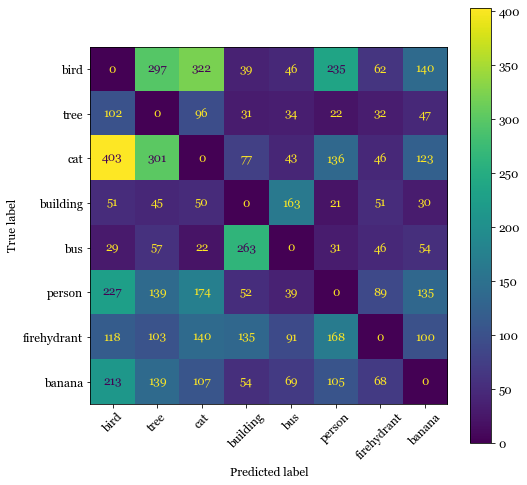

In [40]:
pred = df["choiced_category"]
true = df["category"]
cm = confusion_matrix(true, pred, labels = ['bird','tree','cat','building','bus','person','firehydrant','banana'])
diag_idx = np.diag_indices(cm.shape[0]) # find the coordinates of the diagonal
zeroed_cm = cm # duplicate the diagonal
zeroed_cm[diag_idx] = 0 # zero out the values on it
with matplotlib.rc_context({'axes.grid': False}):
    fig, ax = plt.subplots(figsize = (8,8))
    cm_display = ConfusionMatrixDisplay(zeroed_cm,display_labels=['bird','tree','cat','building','bus','person','firehydrant','banana']).plot(xticks_rotation=45, ax = ax)
"""
OK so what happened now? It seems a bit wrong, true duos dominating the matrix?
"""
